<a href="https://colab.research.google.com/github/diegogc506/SummerInternship2021WSU/blob/main/Basic_Math_Model_of_Hurricane_winds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Defining parameters
K = 1.14
B = 10
r_mw = 30
r_s = 200
w_m = 75
longi = 1
E = K*w_m

In [ ]:
# Piecewise Mathematical equation 'W(x)' for windspeed with respect to distance from hurricane eye
def w(dist):
  if dist>= 0 and dist<30:
    ans = (E)*1-math.exp(-longi*dist)
  if dist>=r_mw and dist<=r_s:
    ans = w_m*math.exp(-(np.log(B)/(r_s-r_mw))*(dist-r_mw))
  if dist>r_s:
    ans = 0
  return ans;

# function to define distance from center point
def distance(c_xval, c_yval, x_xval, x_yval):
  L = math.sqrt((c_xval-x_xval)**2 + (c_yval-x_yval)**2)
  return L;

In [ ]:
def staticmodel(c_xval, c_yval):
  # try to use grid to get directly to distance formula
  df = pd.DataFrame()
  # define hurricane center
  for x in range(200):
    nums = []
    for y in range(200):
      nums.append(w(distance(c_xval, c_yval, x,y)))
    ser = pd.Series(data=nums, name=str(x))
    df = df.append(ser)
  return df

# moving center using vector
def vector_shift(angle, magnitude, rads_bool, c_xval, c_yval):
  if rads_bool == True:
    c_xval += math.cos(angle)*magnitude
    c_yval += math.sin(angle)*magnitude
  else:
    c_xval += math.cos(angle*180/math.pi)*magnitude
    c_yval += math.sin(angle*180/math.pi)*magnitude
  return(c_xval,c_yval)
c_xval, c_yval = vector_shift(0, 90, False, c_xval, c_yval)
print(c_xval, c_yval)

  # def timestep_2hr(orig_x, orig_y, hurrpath

483.0 100.0


In [ ]:
# take positions on hurricane track as a list of x and y points
xcenters = [100,110,120,130,140,150]
ycenters = [100,90,80,70,60,50]

# return timestep (dictionary) taking in path values for x and y
# NOTE: this only moves the center, it has not yet implemented the algorithm
def Timestep(xcenters,ycenters):
  Timestep = {}
  columns = []
  for i in range(len(xcenters)):
    name = 'TS' + str(i)
    Timestep[name] = staticmodel(xcenters[i],ycenters[i])
  return Timestep

[100, 110, 120, 130, 140, 150]

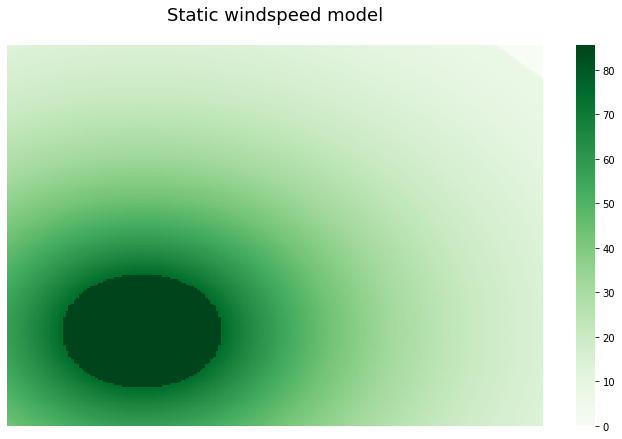

In [ ]:
#@title create/access timestep { run: "auto" }
step = 5 #@param {type:"slider", min:0, max:5, step:1}
TS = 'TS' + str(step)
model=Timestep(xcenters, ycenters)
df = model[TS]

fig, ax = plt.subplots(figsize=(12,7))
title = "Static windspeed model"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df, annot=False, cmap='Greens', linewidths=0.0, ax=ax)
plt.show()

In [ ]:
# establish y & x values for hurricane eye
c_xval = 5
c_yval = 5
df = pd.DataFrame()
# define hurricane center
for x in range(200):
  nums = []
  for y in range(200):
    nums.append(w(distance(c_xval, c_yval, x,y)))
  ser = pd.Series(data=nums, name=str(x))
  df = df.append(ser)
df.head(35)


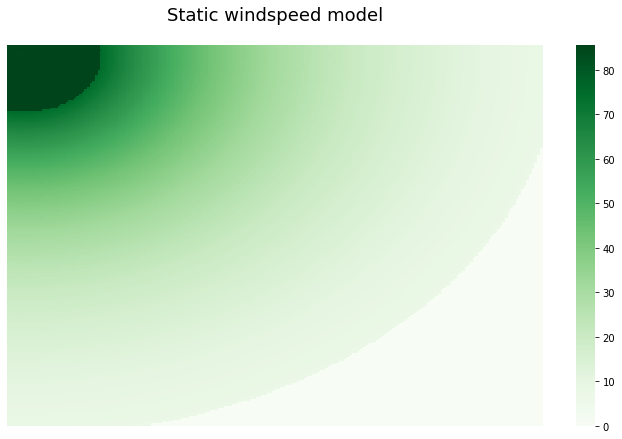

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
title = "Static windspeed model"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df, annot=False, cmap='Greens', linewidths=0.0, ax=ax)
plt.show()